In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
def LoadData(file,deli):
    data = np.loadtxt(file,delimiter=deli)
    print("Dimensions",data.shape)
    print("First 5 Rows : ")
    print(data[1:5,:])
    return(data)

In [3]:
data = LoadData('data/ex2data1.txt',',')

Dimensions (100, 3)
First 5 Rows : 
[[30.28671077 43.89499752  0.        ]
 [35.84740877 72.90219803  0.        ]
 [60.18259939 86.3085521   1.        ]
 [79.03273605 75.34437644  1.        ]]


In [4]:
X = data[:,0:2]
y = data[:,-1]

In [5]:
print("X Shape",X.shape)
print("y Shape",y.shape)

X Shape (100, 2)
y Shape (100,)


In [6]:
def InsertOnes(X):
    return np.c_[np.ones(X.shape[0]),X]

In [7]:
def Sigmoid(t):
    return 1/ (1+ np.exp(-1*t))

In [8]:
def h(theta,X):
    return(Sigmoid(X.dot(theta)))

In [9]:
def PlotData(X,y):
    pos = X[y==1]
    neg = X[y==0]
    plt.scatter(pos[:,0],pos[:,1],marker ='o',c='black',label='Admitted')
    plt.scatter(neg[:,0],neg[:,1],marker ='x',c='red',label='Not Admitted')
    plt.legend(loc='lower left',frameon=False)
    plt.figure(figsize=(12,8)) 

In [10]:
X_bias = InsertOnes(X)
theta = np.zeros(X_bias.shape[1])

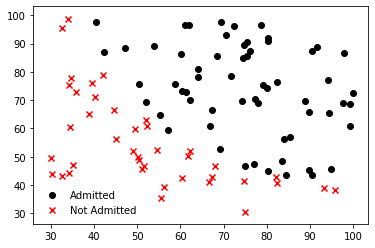

<Figure size 864x576 with 0 Axes>

In [11]:
PlotData(X,y)

In [12]:
#def CostFunction(X,y,theta):
#    m = X.shape[0]
#    J = (1/m)*np.sum( -y*np.log(h(X,theta)) - (1-y)*np.log(h(X,theta)) )
#    return J
def costFunction(theta, X, y):
    m = y.size
    h = Sigmoid(X.dot(theta))
    
    J = -1*(1/m)*(np.log(h).T.dot(y)+np.log(1-h).T.dot(1-y))
               
    return np.sum(J)



In [13]:
def CostFunction(theta,X,y):
    m = X.shape[0]
    J = (-1/m)*np.sum( y*np.log(h(theta,X)) + (1-y)*np.log(h(theta,X)) )
    return J

In [14]:
print(CostFunction(theta,X_bias,y))

0.6931471805599453


In [15]:
def Gradient(theta,X,y):
    hthetaX = h(theta,X)
    grad = np.dot(np.transpose(X), (hthetaX - y))
    return grad/X.shape[0]

In [16]:
print('Gradient : ',Gradient(theta,X_bias,y))

Gradient :  [ -0.1        -12.00921659 -11.26284221]


In [17]:
from scipy.optimize import minimize
res = minimize(costFunction, x0=theta, args=(X_bias,y), method = None, jac=Gradient, options={'maxiter':1500})
res

/Users/ananyapa/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:9: RuntimeWarning: divide by zero encountered in log
  if __name__ == '__main__':


      fun: 0.2034977015894438
 hess_inv: array([[ 3.31474479e+03, -2.63892205e+01, -2.70237122e+01],
       [-2.63892205e+01,  2.23869433e-01,  2.02682332e-01],
       [-2.70237122e+01,  2.02682332e-01,  2.35335117e-01]])
      jac: array([-9.52476821e-09, -9.31921318e-07, -2.82608929e-07])
  message: 'Optimization terminated successfully.'
     nfev: 31
      nit: 23
     njev: 31
   status: 0
  success: True
        x: array([-25.16133284,   0.2062317 ,   0.2014716 ])

In [18]:
def predict(theta,X,threshold=0.5):
    P = h(theta,X) >= threshold
    return(P.astype('int'))

In [19]:
p = predict(res.x,X_bias)
print('Train accuracy {}%'.format(100*sum(p == y.ravel())/p.size))

Train accuracy 89.0%


### Creating the Decision Boundry

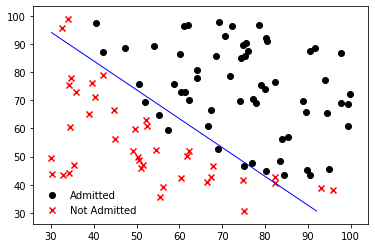

<Figure size 864x576 with 0 Axes>

In [20]:
# Creating the Mix Max Value
x1_min, x1_max = X_bias[:,1].min(), X_bias[:,1].max(),
x2_min, x2_max = X_bias[:,2].min(), X_bias[:,2].max(),

# Creating the Meshgrid of numbers from min to max both X and Y AXIS 
xx1, xx2 = np.meshgrid(np.linspace(x1_min, x1_max), np.linspace(x2_min, x2_max))

# Calculating the Predicted value for the numbers using the claulcated min theta 
meshdata = np.c_[np.ones((xx1.ravel().shape[0],1)), xx1.ravel(), xx2.ravel()]
h = Sigmoid(meshdata.dot(res.x))
h = h.reshape(xx1.shape)

#Plotting the values for the meshgrid we just created
plt.contour(xx1, xx2, h, [0.5], linewidths=1, colors='b');

#Plotting positive Nehative numbers 
PlotData(X,y)
plt.show()

### Doing Everything with SKLEARN

In [25]:
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler

In [23]:
# Peaking at the data 
X[1:5,:]

array([[30.28671077, 43.89499752],
       [35.84740877, 72.90219803],
       [60.18259939, 86.3085521 ],
       [79.03273605, 75.34437644]])

In [24]:
y[1:5]

array([0., 0., 1., 1.])

In [27]:
SS = StandardScaler()
Xscaled = SS.fit_transform(X)
Xscaled[1:4,:]

array([[-1.82625564, -1.2075414 ],
       [-1.53903969,  0.3612943 ],
       [-0.28210129,  1.0863683 ]])

In [28]:
clf = LogisticRegression(random_state=123)
clf.fit(Xscaled,y)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=123, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [30]:
prediction = clf.predict(Xscaled)
from sklearn.metrics import confusion_matrix
confusion_matrix(y,prediction)

array([[34,  6],
       [ 5, 55]])

In [57]:
print("Model Accuracy = {}%".format(np.sum(prediction==y)/y.size))

Model Accuracy = 0.89%


### Lets Try Splitting the Data 

In [63]:
from sklearn.model_selection import train_test_split
Xtrain,Xtest,ytrain,ytest=train_test_split(X,y,test_size=0.33)

In [64]:
clf.fit(Xtrain,ytrain)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=123, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [65]:
prediction = clf.predict(Xtest)
confusion_matrix(ytest,prediction)

array([[12,  3],
       [ 3, 15]])

In [69]:
print("Model Accuracy = {}%".format(np.sum(prediction==ytest)/ytest.size))

Model Accuracy = 0.8181818181818182%


Model Accuracy Decreased when we assumed less data but it might be good for prediction more test data.